In [20]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from ucimlrepo import fetch_ucirepo
# Configuration for Reproducibility
# Setting seeds ensures that experiments are repeatable with the same results
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Iris Flower Classification (Binary Task)

In this section, we work with the classic **Iris dataset**.
Although the dataset typically contains 3 classes, for this experiment we convert it into a **Binary Classification** problem:
* **Class 1:** *Iris Setosa*
* **Class 0:** Others (*Versicolor* & *Virginica*)

**Objective:** Train a Multi-Layer Perceptron (MLP) to distinguish *Setosa* from other species based on sepal and petal measurements.

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]
Unique varieties: ['Setosa' 'Versicolor' 'Virginica']
     sepal.length  sepal.width  petal.length  petal.width    variety    y
0             5.1   

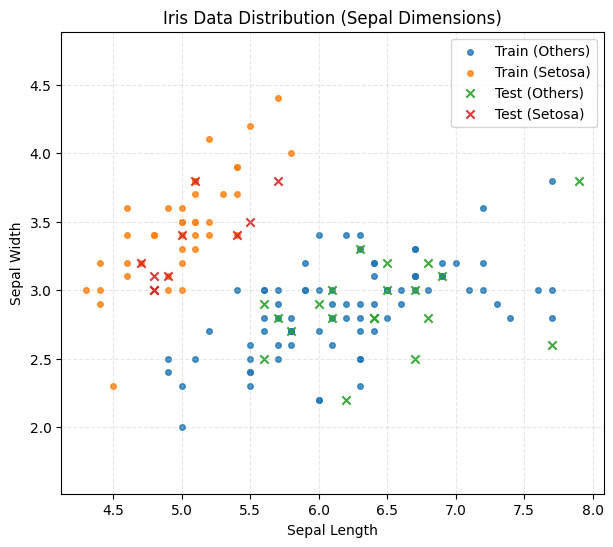

Training data:
Loss: 2.307433715031948e-05, test accuracy: 1.000
Testing data:
Loss: 1.995043203351088e-05, test accuracy: 1.000


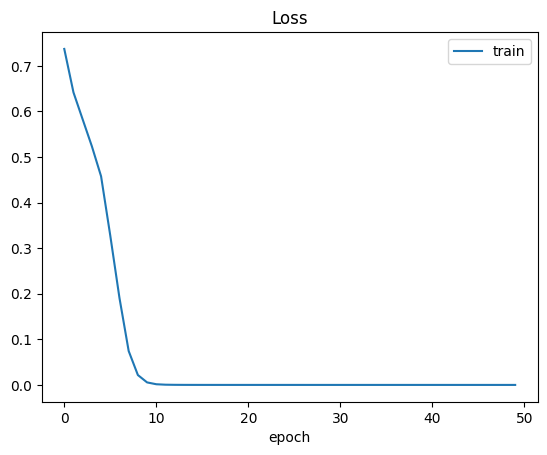

In [21]:
#Data loading
file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)
print(dataframe)

# Inspecting raw data
print("Unique varieties:", dataframe['variety'].unique())

# Transforming to Binary Problem (One-vs-Rest)
# Setosa = 1.0, Others = 0.0
dataframe['y'] = dataframe['variety'].map(
{'Setosa': 1.0, 'Versicolor': 0.0, 'Virginica': 0.0})
print(dataframe)

# Selecting Features and Target
# Features: sepal.length, sepal.width, petal.length, petal.width
X = dataframe[ ['sepal.length', 'sepal.width', 'petal.length',
'petal.width']]
y = dataframe['y']

# Train/Test Split
# Using global SEED for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


# Visualization
plt.figure(figsize=(7, 6))
# train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train (Others)')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train (Setosa)')

# test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test (Others)')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test (Setosa)')
plt.title('Iris Data Distribution (Sepal Dimensions)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Model Architecture & Training

# 4 Input features -> Hidden Layers -> 1 Output (Binary)
model = keras.Sequential([
layers.Input(shape=(4,)),
layers.Dense(8, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)

print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()



### Model Evaluation (Metrics & Confusion Matrix)

We evaluate the model's performance on both Training and Testing sets using standard binary classification metrics:
* **Accuracy:** Overall correctness.
* **Precision:** Accuracy of positive predictions.
* **Recall:** Ability to find all positive instances.
* **Confusion Matrix:** Detailed breakdown of True Positives, True Negatives, False Positives, and False Negatives.

In [22]:
# Evaluation on Training Data

# Predicting results on training set
y_pred_train = model.predict(X_train)

# Rounding probabilities to class labels (0 or 1)
y_pred_train_rounded = np.round(y_pred_train)

# Calculating metrics
accuracy = accuracy_score(y_train, y_pred_train_rounded)
precision = precision_score(y_train, y_pred_train_rounded)
recall = recall_score(y_train, y_pred_train_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

# Evaluation on Testing Data

# Predicting results on test set
y_pred_test = model.predict(X_test)

# Rounding probabilities to class labels (0 or 1)
y_pred_test_rounded = np.round(y_pred_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_test_rounded)
precision = precision_score(y_test, y_pred_test_rounded)
recall = recall_score(y_test, y_pred_test_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [ 0 40]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]


## Iris Classification: Versicolor vs. Others

In this experiment, we modify the binary classification task. Instead of identifying *Setosa* (which is linearly separable), we attempt to classify **Versicolor** (Class 1) against the others (*Setosa* & *Virginica*).

**Challenge:** This is a more complex problem because *Versicolor* data points are often located between the other two classes in the feature space, requiring the model to learn non-linear boundaries.

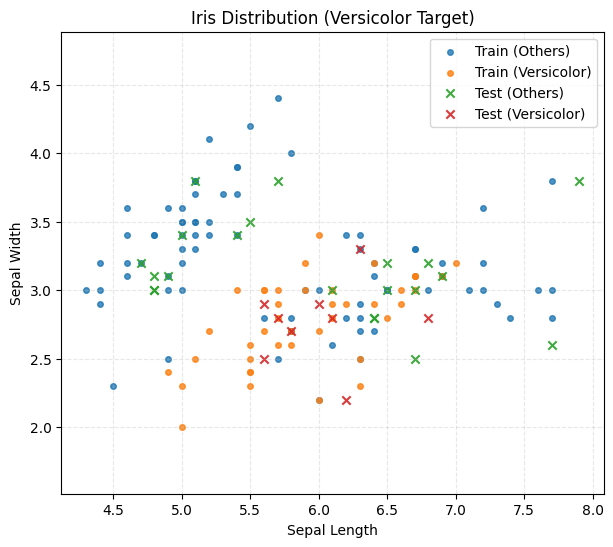

Training data:
Loss: 0.05668367072939873, test accuracy: 0.975
Testing data:
Loss: 0.04274022579193115, test accuracy: 1.000


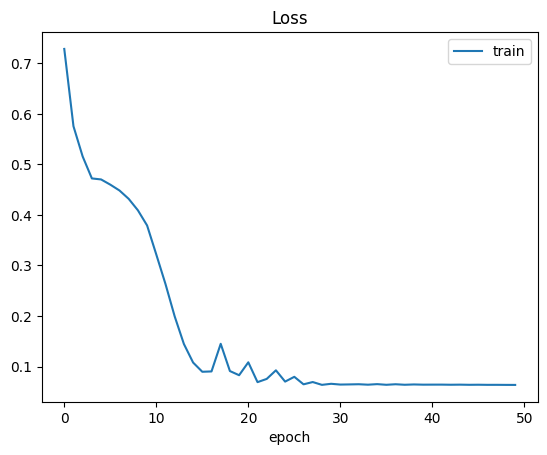

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.975
Precision: 0.9523809523809523
Recall: 0.975609756097561
Confusion Matrix:
 [[77  2]
 [ 1 40]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[21  0]
 [ 0  9]]


In [23]:
# Data Preparation (Target: Versicolor)

file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)

# Mapping: Versicolor = 1.0, Others = 0.0
dataframe['y'] = dataframe['variety'].map(
{'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 0.0})

# Features & Target
X = dataframe[ ['sepal.length', 'sepal.width', 'petal.length',
'petal.width']]
y = dataframe['y']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

plt.figure(figsize=(7, 6))
# train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train (Others)')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train (Versicolor)')
# test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test (Others)')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test (Versicolor)')
plt.title('Iris Distribution (Versicolor Target)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Model Architecture & Training

model = keras.Sequential([
layers.Input(shape=(4,)),
layers.Dense(8, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)

print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Evaluation on Training Data

# Predicting results on training set
y_pred_train = model.predict(X_train)

# Rounding probabilities to class labels (0 or 1)
y_pred_train_rounded = np.round(y_pred_train)

# Calculating metrics
accuracy = accuracy_score(y_train, y_pred_train_rounded)
precision = precision_score(y_train, y_pred_train_rounded)
recall = recall_score(y_train, y_pred_train_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

# Evaluation on Testing Data

# Predicting results on test set
y_pred_test = model.predict(X_test)

# Rounding probabilities to class labels (0 or 1)
y_pred_test_rounded = np.round(y_pred_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_test_rounded)
precision = precision_score(y_test, y_pred_test_rounded)
recall = recall_score(y_test, y_pred_test_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

## Iris Classification: Virginica vs. Others

In this final binary classification experiment, we target **Iris Virginica**. We map the dataset such that *Virginica* is Class 1, while *Setosa* and *Versicolor* are grouped as Class 0.

**Objective:** Verify if the neural network can successfully distinguish *Virginica* from the other two species.

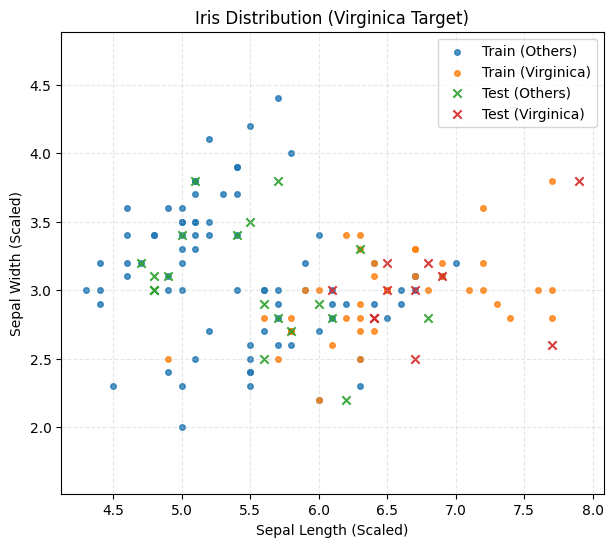

Training data:
Loss: 0.05657649412751198, test accuracy: 0.975
Testing data:
Loss: 0.06120868772268295, test accuracy: 1.000


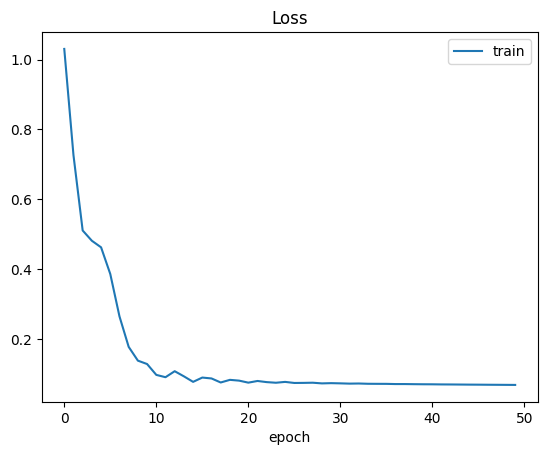

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.975
Precision: 0.9736842105263158
Recall: 0.9487179487179487
Confusion Matrix:
 [[80  1]
 [ 2 37]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[19  0]
 [ 0 11]]


In [24]:
# Data Preparation (Target: Virginica)

file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)

# Mapping: Virginica = 1.0, Others = 0.0
dataframe['y'] = dataframe['variety'].map(
{'Setosa': 0.0, 'Versicolor': 0.0, 'Virginica': 1.0})

# Features & Target
X = dataframe[ ['sepal.length', 'sepal.width', 'petal.length',
'petal.width']]
y = dataframe['y']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

plt.figure(figsize=(7, 6))
# train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16,
marker='o', alpha=0.8, label='Train (Others)')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16,
marker='o', alpha=0.8, label='Train (Virginica)')
# test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36,
marker='x', alpha=0.9, label='Test (Others)')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36,
marker='x', alpha=0.9, label='Test (Virginica)')
plt.title('Iris Distribution (Virginica Target)')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Model Architecture & Training

model = keras.Sequential([
layers.Input(shape=(4,)),
layers.Dense(8, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
verbose=0)

# Plotting Loss
print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Evaluation on Training Data

# Predicting results on training set
y_pred_train = model.predict(X_train)

# Rounding probabilities to class labels (0 or 1)
y_pred_train_rounded = np.round(y_pred_train)

# Calculating metrics
accuracy = accuracy_score(y_train, y_pred_train_rounded)
precision = precision_score(y_train, y_pred_train_rounded)
recall = recall_score(y_train, y_pred_train_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

# Evaluation on Testing Data

# Predicting results on test set
y_pred_test = model.predict(X_test)

# Rounding probabilities to class labels (0 or 1)
y_pred_test_rounded = np.round(y_pred_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_test_rounded)
precision = precision_score(y_test, y_pred_test_rounded)
recall = recall_score(y_test, y_pred_test_rounded)

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rounded)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

## Multi-Class Classification: All Iris Species

In this final experiment, we tackle the full **Multi-Class Classification** problem. The goal is to classify an Iris flower into one of three categories:
* **0:** Setosa
* **1:** Versicolor
* **2:** Virginica

**Key Changes:**
* **Output Layer:** 3 neurons with **Softmax** activation (probability distribution over classes).
* **Loss Function:** `categorical_crossentropy`.
* **Target Encoding:** One-Hot Encoding (converting labels 0, 1, 2 into vectors like `[1, 0, 0]`).

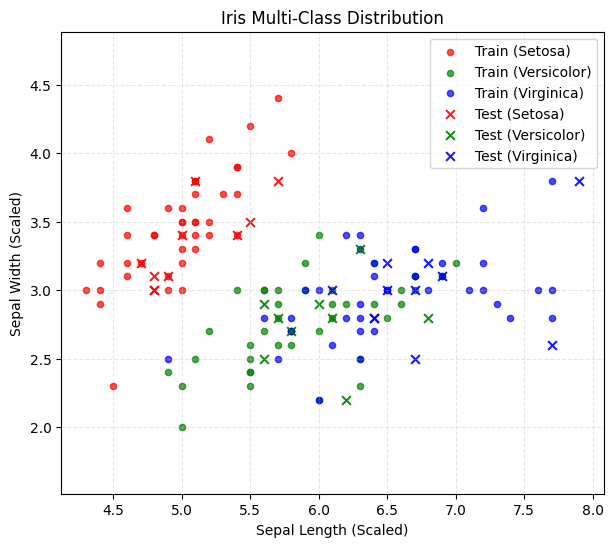

Training data:
Loss: 0.05616668611764908, test accuracy: 0.975
Testing data:
Loss: 0.05757692828774452, test accuracy: 1.000


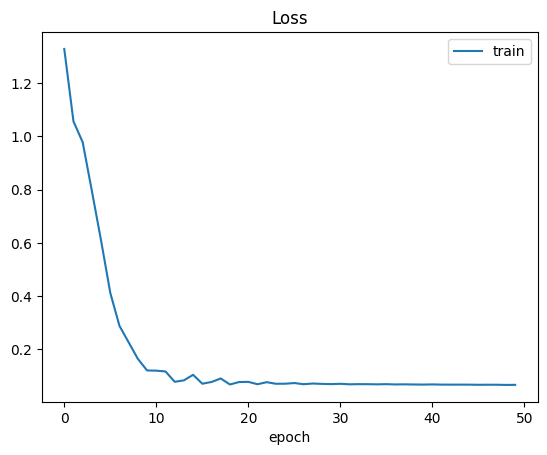

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.975
Precision: 0.9753550543024226
Recall: 0.9747759016051699
Confusion Matrix:
 [[40  0  0]
 [ 0 40  1]
 [ 0  2 37]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:
# Data Preparation (Multi-Class)
file = 'https://marcingabryel.pl/ai/iris.csv'
dataframe = pd.read_csv(file)
# Mapping all 3 classes: Setosa (0), Versicolor (1), Virginica (2)
dataframe['y'] = dataframe['variety'].map(
{'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0})

X = dataframe[ ['sepal.length', 'sepal.width', 'petal.length',
'petal.width']]
y = dataframe['y']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

count = 3
y_train_3 = np.zeros((y_train.size, count))
y_train_3[np.arange(y_train.size), y_train.astype(int)] = 1.0

y_test_3 = np.zeros((y_test.size, count))
y_test_3[np.arange(y_test.size), y_test.astype(int)] = 1.0

plt.figure(figsize=(7, 6))
# Train Data
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, marker='o', alpha=0.7, label='Train (Setosa)', c='red')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, marker='o', alpha=0.7, label='Train (Versicolor)', c='green')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], s=20, marker='o', alpha=0.7, label='Train (Virginica)', c='blue')

# Test Data
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=40, marker='x', alpha=0.9, label='Test (Setosa)', c='red')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=40, marker='x', alpha=0.9, label='Test (Versicolor)', c='green')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], s=40, marker='x', alpha=0.9, label='Test (Virginica)', c='blue')

plt.title('Iris Multi-Class Distribution')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.legend()
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

model = keras.Sequential([
layers.Input(shape=(4,)),
layers.Dense(8, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(3, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train_3, epochs=50, batch_size=32,
verbose=0)

# Plotting Loss
print("Training data:")
loss, acc = model.evaluate(X_train, y_train_3, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test_3, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

# Evaluation on Training Data

# Predicting results on training set
y_pred_train = model.predict(X_train)

# Getting class index
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_train, y_pred_train_classes)
precision = precision_score(y_train, y_pred_train_classes, average='macro')
recall = recall_score(y_train, y_pred_train_classes, average='macro')

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_classes)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

# Evaluation on Testing Data

# Predicting results on test set
y_pred_test = model.predict(X_test)

# Rounding probabilities to class labels (0 or 1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_test_classes)
precision = precision_score(y_test, y_pred_test_classes, average='macro')
recall = recall_score(y_test, y_pred_test_classes, average='macro')

# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_classes)

# Displaying results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

## Deep Learning for Medical Data (Diabetes)

In this task, we analyze the **Pima Indians Diabetes Dataset**. We tackle the binary classification problem (Healthy vs. Diabetic) using a deeper neural network architecture.

**Key Engineering Improvements:**
* **Batch Normalization:** Stabilizes learning and accelerates convergence.
* **Dropout (0.3):** Randomly deactivates 30% of neurons during training to prevent overfitting.
* **Early Stopping:** Automatically stops training when the validation loss stops improving.

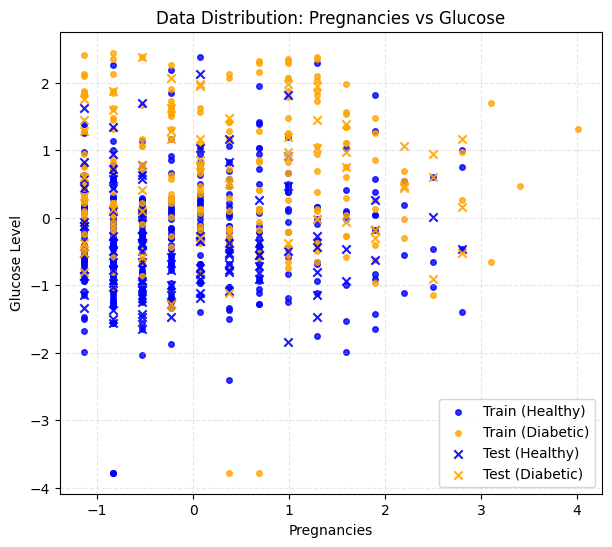

Training data:
Loss: 0.4368019104003906, test accuracy: 0.803
Testing data:
Loss: 0.5038127899169922, test accuracy: 0.747


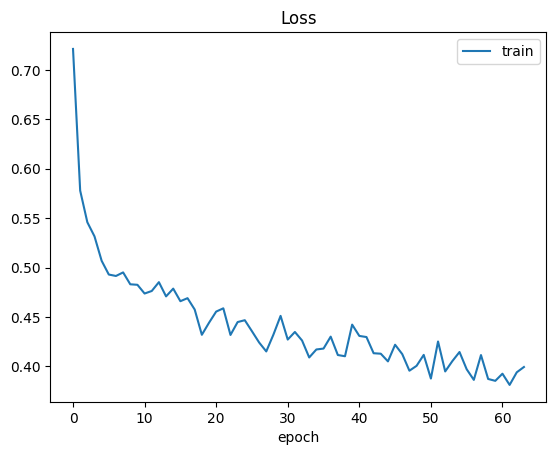

In [26]:
# Diabetes Classification

# Data Preparation
file = 'https://marcingabryel.pl/ai/pid.csv'
dataframe = pd.read_csv(file)

y = dataframe['class']

# Selecting features
X = dataframe[ ['pregnancies', 'glucose', 'blood_pressure',
'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

plt.figure(figsize=(7, 6))
# Train
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=16, marker='o', alpha=0.8, label='Train (Healthy)', c='blue')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=16, marker='o', alpha=0.8, label='Train (Diabetic)', c='orange')
# Test
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], s=36, marker='x', alpha=0.9, label='Test (Healthy)', c='blue')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], s=36, marker='x', alpha=0.9, label='Test (Diabetic)', c='orange')

plt.title('Data Distribution: Pregnancies vs Glucose')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

#Advanced Model Architecture
model = keras.Sequential([
layers.Input(shape=(8,)),
layers.BatchNormalization(),
layers.Dense(128, activation='relu'),
layers.Dropout(0.3),
layers.BatchNormalization(),
layers.Dense(64, activation='relu'),
layers.Dropout(0.3),
layers.Dense(32, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
loss='binary_crossentropy', metrics=['accuracy'])

stop_early = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test),
callbacks=[stop_early], verbose=0)

# Evaluation
print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

## Student Performance Prediction (UCI Repository)

In this final project, we fetch data directly from the **UCI Machine Learning Repository** using the API. We predict whether a student will pass the final exam (Grade G3 >= 10).

**Key Techniques:**
* **API Data Fetching:** Using `ucimlrepo`.
* **One-Hot Encoding:** Converting categorical variables using `pd.get_dummies`.
* **Deep Neural Network:** Using the same robust architecture (BatchNorm + Dropout) as in the medical analysis.

Training data:
Loss: 0.2237197756767273, test accuracy: 0.931
Testing data:
Loss: 0.2853690981864929, test accuracy: 0.892


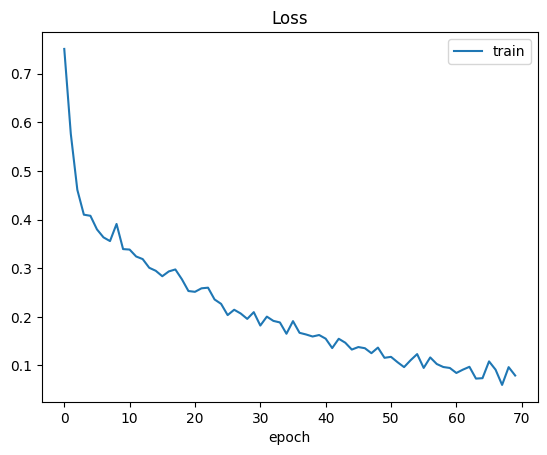

In [27]:
# Task 6: Student Performance (External API)

# Fetching Data
student_performance = fetch_ucirepo(id=320)

# Features & Targets
X_raw = student_performance.data.features
y_raw = student_performance.data.targets

# Target Engineering: Grade G3 >= 10 means Pass (1)
y = (y_raw['G3'] >= 10).astype(int)

# Feature Engineering: One-Hot Encoding
X = pd.get_dummies(X_raw, drop_first=True)
X = X.astype(float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=SEED)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Model Architecture
model = keras.Sequential([
layers.Input(shape=(X_train.shape[1],)),
layers.BatchNormalization(),
layers.Dense(128, activation='relu'),
layers.Dropout(0.3),
layers.BatchNormalization(),
layers.Dense(64, activation='relu'),
layers.Dropout(0.3),
layers.Dense(32, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
loss='binary_crossentropy', metrics=['accuracy'])

stop_early = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Training
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test),
callbacks=[stop_early], verbose=0)

print("Training data:")
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
print("Testing data:")
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, test accuracy: {acc:.3f}")
plt.plot(history.history['loss'], label='train')
plt.title('Loss'); plt.xlabel('epoch'); plt.legend(); plt.show()

